# Filter Bank
Implement 1 branch, subband k=1, of the analysis and synthesis filter bank with N=16 subbands with 32kHz sampling rate (hence the passband is between 1 kHz and 2 kHz), in **direct implementation**.
Start with designing a bandpass filter using the scipy.signal.remez function, which is an “equi-ripple” FIR filter design function:

## Import the modules:

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

N = 16
b = signal.remez(8*N,[0,500,1000,2000,2500,16000],[0,1,0],[100,1,100],Hz=32000, type='bandpass')

## Check the filter Design:

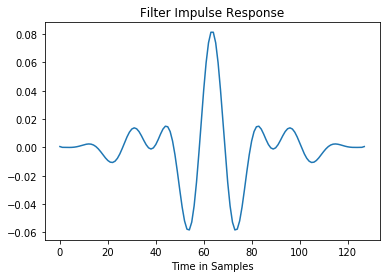

In [2]:
plt.plot(b)
plt.title('Filter Impulse Response')
plt.xlabel('Time in Samples')

## Check the frquency response:

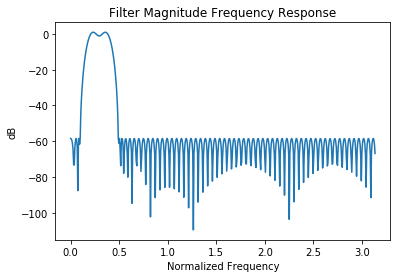

In [3]:
w,H = signal.freqz(b)
plt.plot(w, 20*np.log10(abs(H)+1e-6))
plt.title('Filter Magnitude Frequency Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')

## Now the **analysis filtering and down sampling:**

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 32000)
('Number of samples:', 63488)
('length of sound in samples: ', 63488)


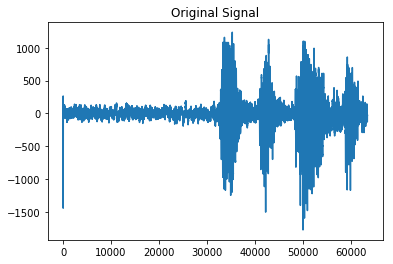

In [4]:
import sound as snd
[s,rate] = snd.wavread('sndfile.wav')
print("length of sound in samples: ", len(s))
plt.plot(s)
plt.title('Original Signal')

## Filter implementation:

('length of filtered sound in samples: ', 63488)


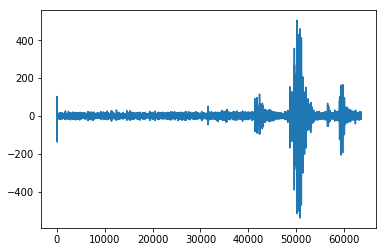

In [5]:
filtered = signal.lfilter(b,1,s)
print("length of filtered sound in samples: ", len(filtered))
plt.plot(filtered)

## Play the filtered sound:

In [6]:
import functions
snd.sound(filtered, 32000)

* done


## Now Down-sampling with factor N:

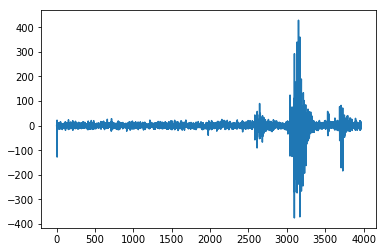

In [7]:
N=16
filteredds = filtered[::N]
plt.plot(filteredds)

## Listen to it at `1/N’th` sampling rate:

In [8]:
snd.sound(filteredds, 2000)

* done


## Now the **up-sampling and synthesis filtering:**

In [9]:
#Up-sampling:
filteredus=np.zeros(len(filteredds)*N)
filteredus[::N]=filteredds

In [10]:
#Listen to the up-sampled sound:
snd.sound(filteredus, 32000)

* done


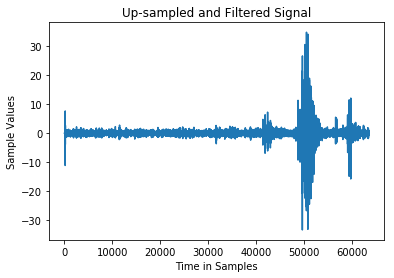

* done


In [11]:
#Synthesis Filtering:
#Bandpass Synthesis Filter implementation to attenuate the spectral copies:
filteredsyn=signal.lfilter(b,1,filteredus)
plt.plot(filteredsyn)
plt.title('Up-sampled and Filtered Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.show()
snd.sound(filteredsyn, 32000)